<a href="https://colab.research.google.com/github/SarkarPriyanshu/Machine-Learning-Models/blob/main/Zomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import ast
import re
import pandas as pd
import numpy as np
from google.colab import drive

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/zomato.csv')

In [4]:
def convertStrRepList(string):
  output = []
  string = string.strip('][').split(', ')
  for value in string:
    if bool(re.match(r"^(\('Rated)", value))==False:
      output.append(value)

  for index in range(0,len(output)):
    if bool(re.match(r"^('RATED\\n)", output[index])):
      output[index] = ' '.join(output[index].split(' ')[1:])
    else:
      pass 

  return output        


In [5]:
df['reviews_list'] = df['reviews_list'].apply(lambda value:convertStrRepList(value))

In [7]:
reviews = list()
for value in df['reviews_list']:
  if isinstance(value,list) and len(value) > 0:
    for item in value:
      if isinstance(item,str):
        reviews.append(item)


In [8]:
reviews = pd.DataFrame(reviews,columns=['reviews'])

In [9]:
# from google.colab import files
# reviews.to_csv('reviews.csv') 
# files.download('reviews.csv')

# Data Cleaning 

In [10]:
df.sample(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
24364,https://www.zomato.com/bangalore/chaatimes-nag...,"Next to Manyata Tech Park, Outer Ring Road, Na...",Chaatimes,Yes,No,3.6/5,27,+91 8884021155,Nagawara,Quick Bites,NaN,"Street Food, Fast Food",200,[ Food taste was good. Speed of delivery was a...,"['Vada Pav', 'Misal Pav', 'Dahi Samosa Chaat',...",Delivery,Kalyan Nagar
3440,https://www.zomato.com/bangalore/rajastani-ras...,"12/3, Market Road, V.V.puram, Basavanagudi, Ba...",Rajastani Rasoi,No,No,3.2 /5,6,+91 9448069548,Basavanagudi,Quick Bites,NaN,North Indian,100,[],[],Dine-out,Basavanagudi


In [11]:
df = df.drop(['url','address','phone','reviews_list','name'],axis=1)

In [12]:
df.sample(3)

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city)
18568,No,No,NaN,0,Indiranagar,Sweet Shop,NaN,"Mithai, Desserts",500,[],Desserts,Indiranagar
51168,Yes,Yes,3.8 /5,128,Whitefield,"Bar, Casual Dining","Beer, Chicken Guntur, Paneer Tikka, Fish, Nood...","North Indian, Continental, Mediterranean","1,200",[],Dine-out,Whitefield
5345,Yes,No,3.2/5,5,Shivajinagar,Quick Bites,NaN,South Indian,300,"['Masala Dosa', 'Onion Dosa', 'Rice Sambar', '...",Delivery,Brigade Road


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   online_order                 51717 non-null  object
 1   book_table                   51717 non-null  object
 2   rate                         43942 non-null  object
 3   votes                        51717 non-null  int64 
 4   location                     51696 non-null  object
 5   rest_type                    51490 non-null  object
 6   dish_liked                   23639 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   menu_item                    51717 non-null  object
 10  listed_in(type)              51717 non-null  object
 11  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(11)
memory usage: 4.7+ MB


In [14]:
df.isnull().sum()/df.shape[0] * 100  

online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [15]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [16]:
df.corr()

,votes
votes,1.0


In [17]:
df.cov()

,votes
votes,646156.901605


In [18]:
df.var()

votes    646156.901605
dtype: float64

In [19]:
for feature in df.columns:
   if df[feature].dtype == 'O':
     print(feature , df[feature].nunique())

online_order 2
book_table 2
rate 64
location 93
rest_type 93
dish_liked 5271
cuisines 2723
approx_cost(for two people) 70
menu_item 9098
listed_in(type) 7
listed_in(city) 30


# Univarient Analysis for Numerica Variables

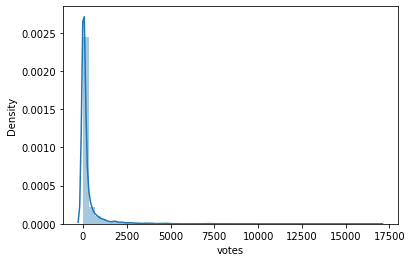

In [20]:
sns.distplot(df['votes'])

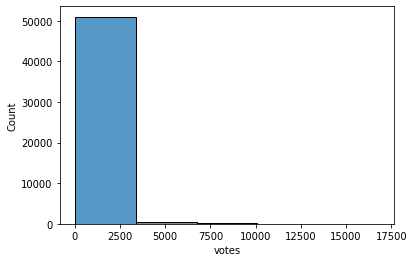

In [21]:
sns.histplot(df['votes'],bins=5)

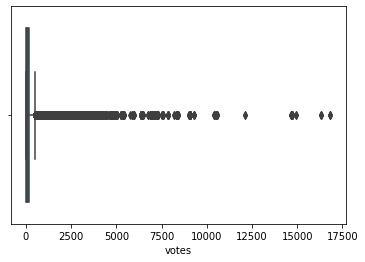

In [22]:
sns.boxplot(df['votes'])

# Univarient Analysis for Categoral variables

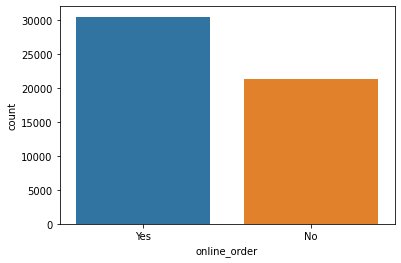

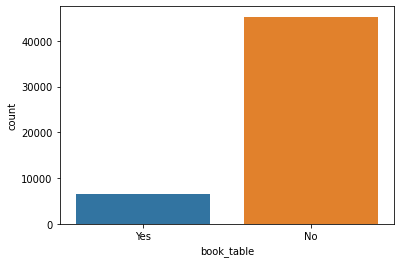

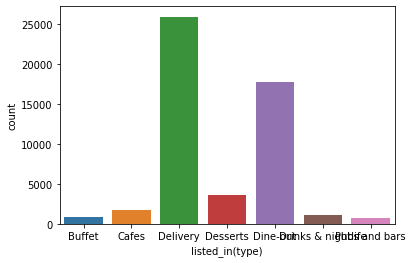

In [23]:
for feature in df.columns:
   if df[feature].dtype == 'O':
     if df[feature].nunique() < 30:
        sns.countplot(df[feature])
        plt.show()

In [24]:
for feature in df.columns:
   if df[feature].dtype == 'O':
     if df[feature].nunique() > 30:
        print(feature,df[feature].nunique())

rate 64
location 93
rest_type 93
dish_liked 5271
cuisines 2723
approx_cost(for two people) 70
menu_item 9098


In [25]:
df['approx_cost(for two people)'] =  df['approx_cost(for two people)'].str.replace(',','')

In [26]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)

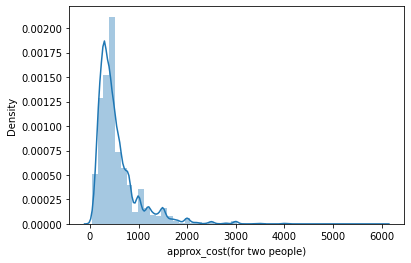

In [27]:
sns.distplot(df['approx_cost(for two people)'])

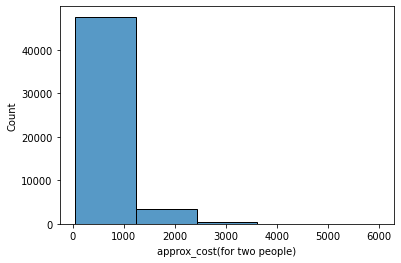

In [28]:
sns.histplot(df['approx_cost(for two people)'],bins=5)

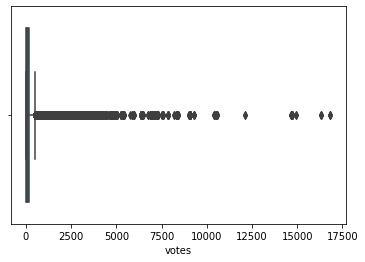

In [29]:
sns.boxplot(df['votes'])

In [30]:
df['menu_item'] = df['menu_item'].replace('[]',np.nan)

# Observations: 
  - Null value Handling
  - Skewed data , feature Tranformation
  - Outliers handling
  - handling high cardinality
  - curce of dimentionality handling


# Note Preprocesing and cleaning:
    - replace rate variable '-' with nan value and then apply mode on it 
    - approx_cost(for two people) replace ',' type conversion to float
    - menu_item replace [] into np.nan
    - location, cuisines, rest_type mode imputation for missing less than 5% data missing.
    - rate, dish_liked, menu_item missing indicator for missing data as more than 5% data is missing
    - votes have 0 in it convert then to nan and due to missing value is more than 17% we add a column for missing indication convert type to int from float.
    - Need to preprocess menu_item column throughly  
    - Log tranfoemation for votes as our target column converge to noral distribution and also handled outliers well
    - Cardinality
       - rates convert string to float and then convert them to categorical variable.
       - Groupby location see relation with target column based on that select top 10 categories and rest to Rare label and then label them to numeric
       - online_order and book_table replace Yes to 1 and No to 0

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['approx_cost(for two people)','dish_liked','menu_item'],axis=1), df['approx_cost(for two people)'], test_size=0.33, random_state=42)

In [33]:
X_train = X_train.reset_index().drop('index',axis=1)
X_test = X_test.reset_index().drop('index',axis=1)

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((34650, 9), (17067, 9), (34650,), (17067,))

In [35]:
X_train.sample(2)

,online_order,book_table,rate,votes,location,rest_type,cuisines,listed_in(type),listed_in(city)
11278,No,No,2.7/5,31,Electronic City,"Takeaway, Delivery",North Indian,Delivery,Electronic City
16701,Yes,No,3.3/5,4,Koramangala 5th Block,Quick Bites,Chinese,Delivery,Koramangala 4th Block


In [36]:
test = df.copy()

# Feature Engineering Analysis

##  Null Value handling

In [37]:
test.shape

(51717, 12)

In [38]:
test.sample(2)

,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city)
46213,No,No,3.1 /5,8,Malleshwaram,Quick Bites,NaN,"Biryani, North Indian",500.0,NaN,Delivery,Rajajinagar
17582,No,No,4.2/5,583,Indiranagar,Cafe,"Wedges, Chicken Waffles, Sandwiches, Blueberry...","Cafe, Desserts",700.0,NaN,Cafes,Indiranagar


In [39]:
X_train['rate'] = X_train['rate'].replace('-',np.nan)
X_train['rate'] = X_train['rate'].fillna(X_train['rate'].mode()[0])

X_test['rate'] = X_test['rate'].replace('-',np.nan)
X_test['rate'] = X_test['rate'].fillna(X_test['rate'].mode()[0])

test['rate'] = test['rate'].replace('-',np.nan)
test['rate'] = test['rate'].fillna(test['rate'].mode()[0])

In [40]:
X_train['votes'] = X_train['votes'].replace(0,np.nan)
X_train['votes_null'] = np.where(X_train['votes']==np.nan,1,0)
X_train['votes'] = X_train['votes'].fillna(X_train['votes'].median())
X_train['votes'] = X_train['votes'].astype(int)


X_test['votes'] = X_test['votes'].replace(0,np.nan)
X_test['votes_null'] = np.where(X_test['votes']==np.nan,1,0)
X_test['votes'] = X_test['votes'].fillna(X_test['votes'].median())
X_test['votes'] = X_test['votes'].astype(int)


test['votes'] = test['votes'].replace(0,np.nan)
test['votes_null'] = np.where(test['votes']==np.nan,1,0)
test['votes'] = test['votes'].fillna(test['votes'].median())
test['votes'] = test['votes'].astype(int)

In [41]:
X_train['location'] = X_train['location'].fillna(X_train['location'].mode()[0])
X_train['cuisines'] = X_train['cuisines'].fillna(X_train['cuisines'].mode()[0])
X_train['rest_type'] = X_train['rest_type'].fillna(X_train['rest_type'].mode()[0])


X_test['location'] = X_test['location'].fillna(X_test['location'].mode()[0])
X_test['cuisines'] = X_test['cuisines'].fillna(X_test['cuisines'].mode()[0])
X_test['rest_type'] = X_test['rest_type'].fillna(X_test['rest_type'].mode()[0])


test['location'] = test['location'].fillna(test['location'].mode()[0])
test['cuisines'] = test['cuisines'].fillna(test['cuisines'].mode()[0])
test['rest_type'] = test['rest_type'].fillna(test['rest_type'].mode()[0])

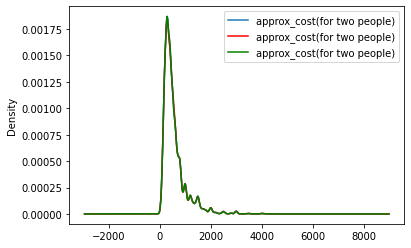

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
test['approx_cost(for two people)'].plot(kind='kde', ax=ax)

# variable imputed with the median
test['approx_cost(for two people)'].fillna(test['approx_cost(for two people)'].mean()).plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
test['approx_cost(for two people)'].fillna(test['approx_cost(for two people)'].median()).plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [43]:
test['approx_cost(for two people)'] = test['approx_cost(for two people)'].fillna(test['approx_cost(for two people)'].median())

In [44]:
X_train['rate_missing'] = np.where(X_train['rate']==np.nan,1,0)

X_test['rate_missing'] = np.where(X_test['rate']==np.nan,1,0)

test['rate_missing'] = np.where(test['rate']==np.nan,1,0)

In [45]:
X_train['rate'] = X_train['rate'].fillna(X_train['rate'].mode()[0])

X_test['rate'] = X_test['rate'].fillna(X_test['rate'].mode()[0])

test['rate'] = test['rate'].fillna(test['rate'].mode()[0])

In [46]:
X_train.isnull().sum()/test.shape[0] * 100  

online_order       0.0
book_table         0.0
rate               0.0
votes              0.0
location           0.0
rest_type          0.0
cuisines           0.0
listed_in(type)    0.0
listed_in(city)    0.0
votes_null         0.0
rate_missing       0.0
dtype: float64

In [47]:
X_test.isnull().sum()/test.shape[0] * 100 

online_order       0.0
book_table         0.0
rate               0.0
votes              0.0
location           0.0
rest_type          0.0
cuisines           0.0
listed_in(type)    0.0
listed_in(city)    0.0
votes_null         0.0
rate_missing       0.0
dtype: float64

In [48]:
test.isnull().sum()/test.shape[0] * 100  

online_order                    0.000000
book_table                      0.000000
rate                            0.000000
votes                           0.000000
location                        0.000000
rest_type                       0.000000
dish_liked                     54.291626
cuisines                        0.000000
approx_cost(for two people)     0.000000
menu_item                      76.603438
listed_in(type)                 0.000000
listed_in(city)                 0.000000
votes_null                      0.000000
rate_missing                    0.000000
dtype: float64

## Target Column Analysis

### Original distribution

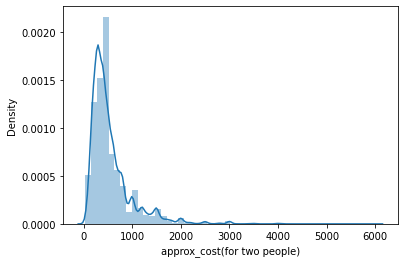

In [49]:
sns.distplot(test['approx_cost(for two people)'])

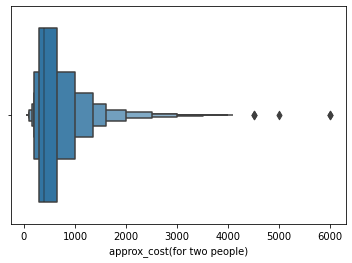

In [50]:
sns.boxenplot(test['approx_cost(for two people)'])

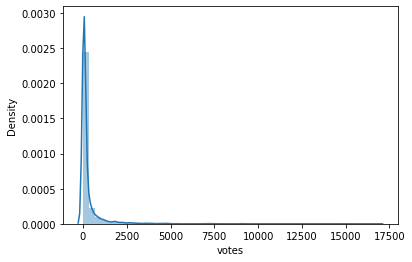

In [51]:
sns.distplot(test['votes'])

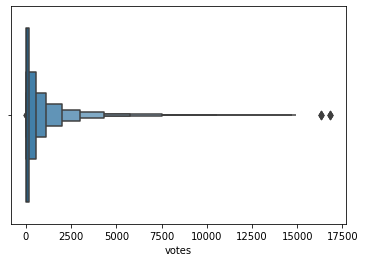

In [52]:
sns.boxenplot(test['votes'])

### Logerithmic Transformation

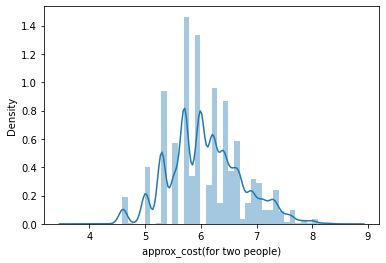

In [53]:
sns.distplot(np.log(test['approx_cost(for two people)']))

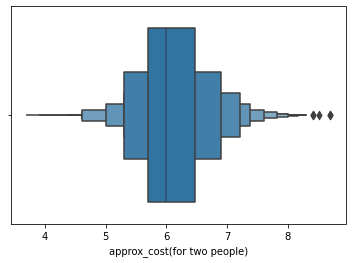

In [54]:
sns.boxenplot(np.log(test['approx_cost(for two people)']))

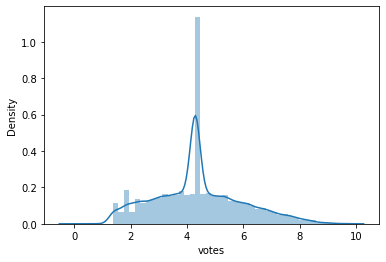

In [55]:
sns.distplot(np.log(test['votes']))

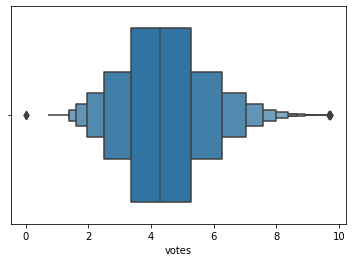

In [56]:
sns.boxenplot(np.log(test['votes']))

### Reciprocal Transformation

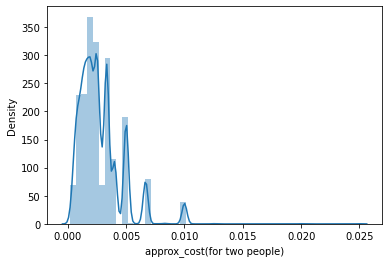

In [57]:
sns.distplot(1/(test['approx_cost(for two people)']))

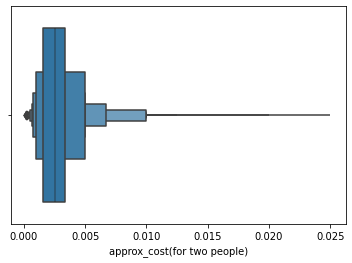

In [58]:
sns.boxenplot(1/(test['approx_cost(for two people)']))

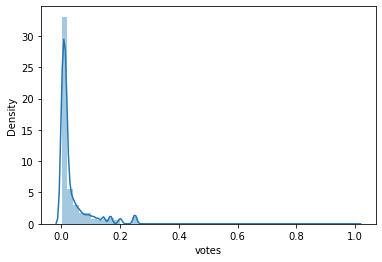

In [59]:
sns.distplot(1/(test['votes']))

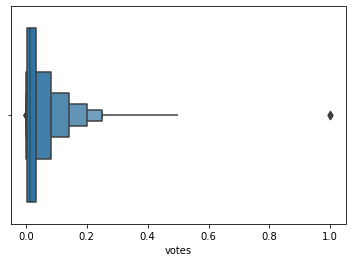

In [60]:
sns.boxenplot(1/(test['votes']))

### Square root Transformation

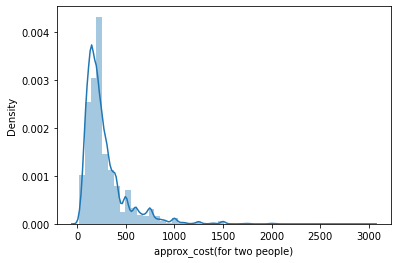

In [61]:
sns.distplot((test['approx_cost(for two people)'])**1/2)

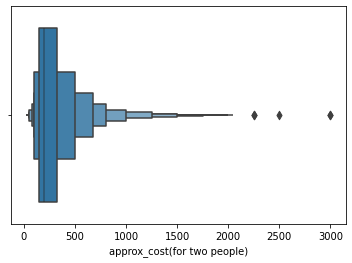

In [62]:
sns.boxenplot((test['approx_cost(for two people)'])**1/2)

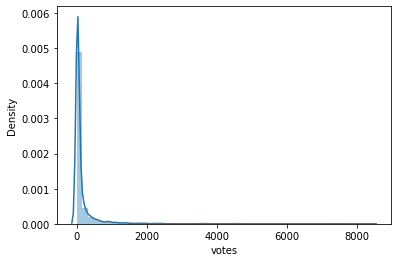

In [63]:
sns.distplot((test['votes'])**1/2)

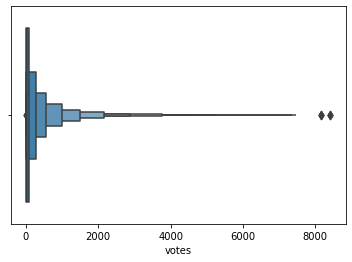

In [64]:
sns.boxenplot((test['votes'])**1/2)

### Exponential Transformation

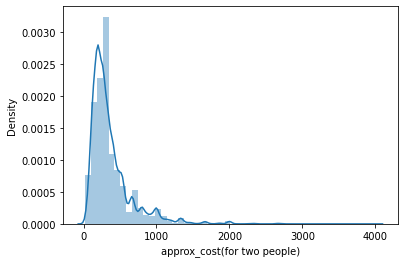

In [65]:
sns.distplot((test['approx_cost(for two people)'])**1/1.5)

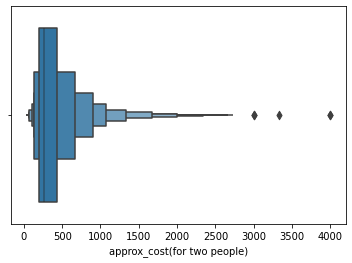

In [66]:
sns.boxenplot((test['approx_cost(for two people)'])**1/1.5)

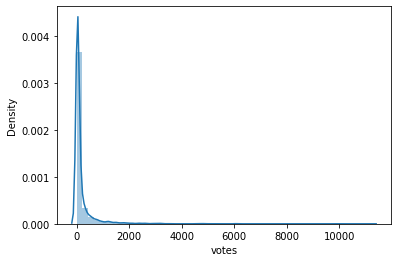

In [67]:
sns.distplot((test['votes'])**1/1.5)

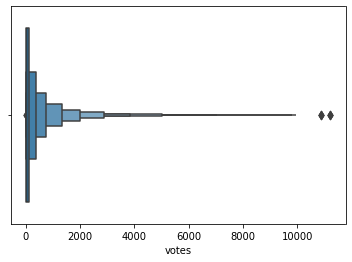

In [68]:
sns.boxenplot((test['votes'])**1/1.5)

### Boxcox Transformation

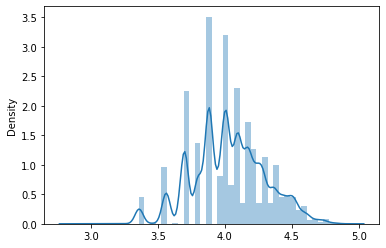

In [69]:
data,param = stats.boxcox(test['approx_cost(for two people)'])
sns.distplot(data)

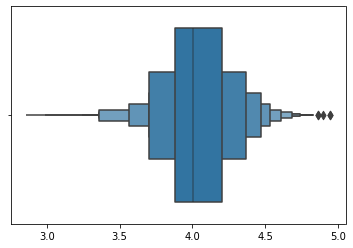

In [70]:
sns.boxenplot(data)

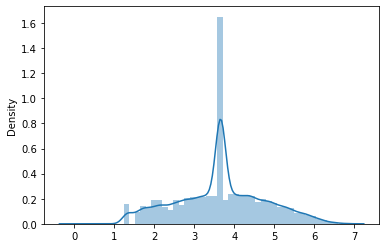

In [71]:
data,param = stats.boxcox(test['votes'])
sns.distplot(data)

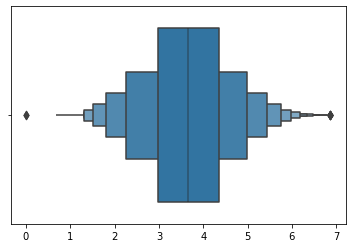

In [72]:
sns.boxenplot(data)

### Yeojohnson Transformation

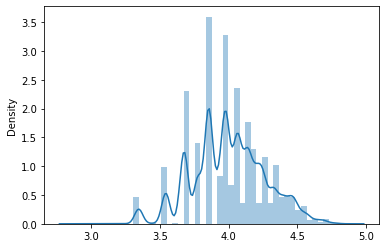

In [73]:
data,param = stats.yeojohnson(test['approx_cost(for two people)'])
sns.distplot(data)

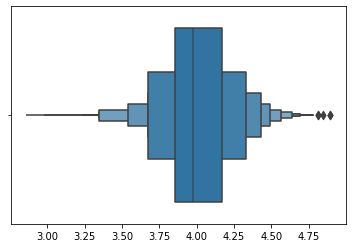

In [74]:
sns.boxenplot(data)

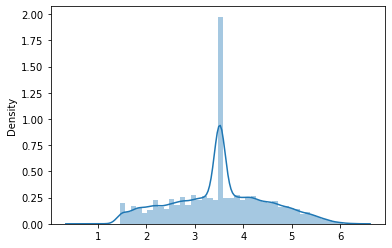

In [75]:
data,param = stats.yeojohnson(test['votes'])
sns.distplot(data)

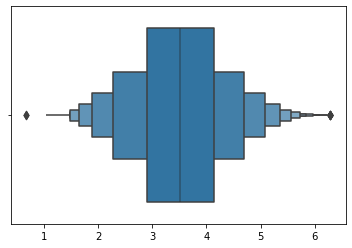

In [76]:
sns.boxenplot(data)

In [77]:
X_train['votes'] = np.log(X_train['votes'])
X_test['votes'] = np.log(X_test['votes'])
test['votes'] = np.log(test['votes'])

## Outlier Analysis

In [78]:
def find_normal_boundaries(df, variable, distance):

    # calculate the boundaries outside which sit the outliers
    # for a Gaussian distribution

    upper_boundary = df[variable].mean() + distance * df[variable].std()
    lower_boundary = df[variable].mean() - distance * df[variable].std()

    return upper_boundary, lower_boundary

In [79]:
RM_upper_limit, RM_lower_limi = find_normal_boundaries(test,'approx_cost(for two people)',3)

In [80]:
outlier_data = test[(test['approx_cost(for two people)'] > RM_upper_limit) | (test['approx_cost(for two people)'] < RM_lower_limi)]

In [81]:
outlier_data.shape

(1057, 14)

In [82]:
outlier_data.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'location', 'rest_type',
       'dish_liked', 'cuisines', 'approx_cost(for two people)', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'votes_null', 'rate_missing'],
      dtype='object')

In [83]:
outlier_data = outlier_data.sort_values(by='approx_cost(for two people)',ascending=False)

In [84]:
test[test['location']=='Residency Road'].shape

(675, 14)

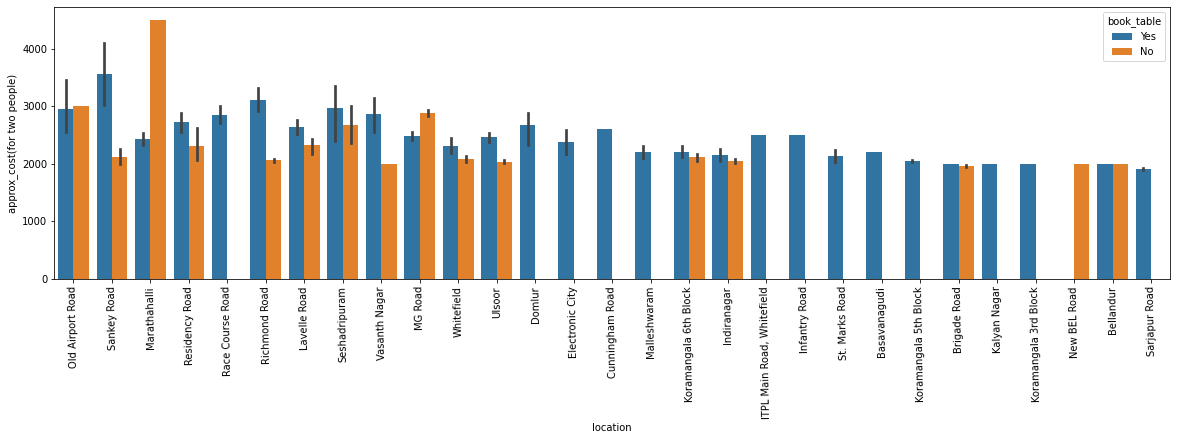

In [85]:
fig = plt.figure(figsize=(20, 5))
sns.barplot(outlier_data['location'],outlier_data['approx_cost(for two people)'],hue=outlier_data['book_table'])
plt.xticks(rotation=91)
fig.show()

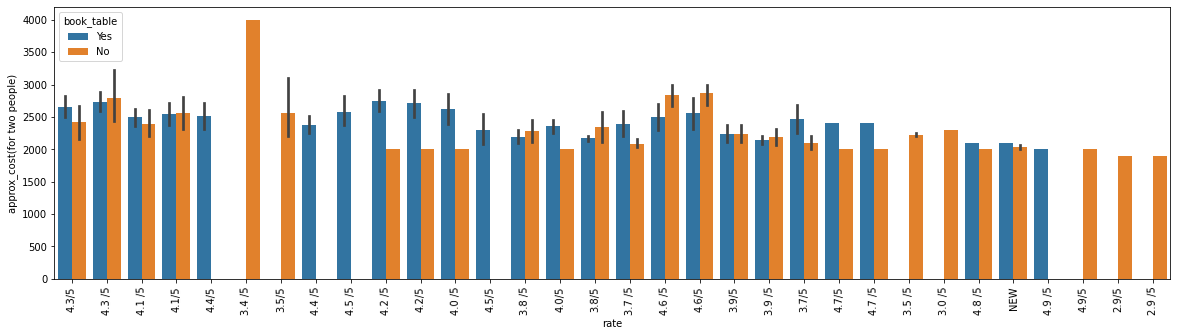

In [86]:
fig = plt.figure(figsize=(20, 5))
sns.barplot(outlier_data['rate'],outlier_data['approx_cost(for two people)'],hue=outlier_data['book_table'])
plt.xticks(rotation=91)
fig.show()

## handling high cardinality

In [87]:
for feature in test.columns:
   if test[feature].dtype == 'O':
      print(feature,test[feature].nunique())

online_order 2
book_table 2
rate 63
location 93
rest_type 93
dish_liked 5271
cuisines 2723
menu_item 9097
listed_in(type) 7
listed_in(city) 30


In [88]:
X_train['rate'] = X_train['rate'].apply(lambda value:str(value).replace('/5',''))
X_test['rate'] = X_test['rate'].apply(lambda value:str(value).replace('/5',''))

test['rate'] = test['rate'].apply(lambda value:str(value).replace('/5',''))

In [89]:
X_train['rate'] = X_train['rate'].apply(lambda value: value if value.strip() =='NEW' else 'Poor' if float(value.strip()) < 2.5 else 'Average' if float(value.strip()) > 2.5 and float(value.strip()) > 3.5  else 'Good')
X_test['rate'] = X_test['rate'].apply(lambda value: value if value.strip() =='NEW' else 'Poor' if float(value.strip()) < 2.5 else 'Average' if float(value.strip()) > 2.5 and float(value.strip()) > 3.5  else 'Good')

test['rate'] = test['rate'].apply(lambda value: value if value.strip() =='NEW' else 'Poor' if float(value.strip()) < 2.5 else 'Average' if float(value.strip()) > 2.5 and float(value.strip()) > 3.5  else 'Good')

In [90]:
X_train['rate'] = X_train['rate'].map({'Good':1,'Average':2,'Poor':3,'NEW':4})
X_test['rate'] = X_test['rate'].map({'Good':1,'Average':2,'Poor':3,'NEW':4})

test['rate'] = test['rate'].map({'Good':1,'Average':2,'Poor':3,'NEW':4})

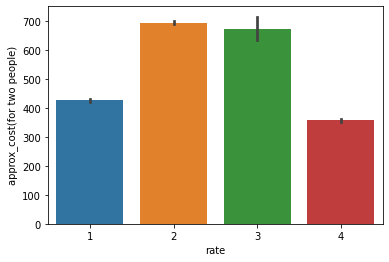

In [91]:
sns.barplot(test['rate'],df['approx_cost(for two people)'])

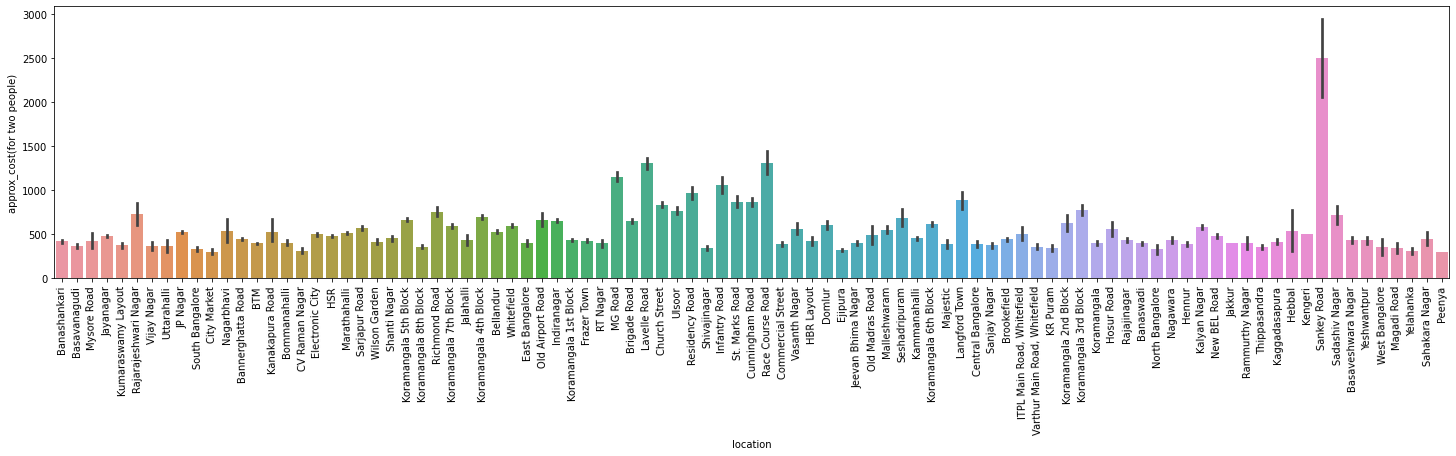

In [92]:
fig = plt.figure(figsize=(25, 5))
sns.barplot(test['location'],df['approx_cost(for two people)'])
plt.xticks(rotation=91)
fig.show()

In [93]:
location_ranks = list(df.groupby('location')['approx_cost(for two people)'].mean().sort_values(axis=0, ascending=False)[:10].to_dict().keys())

In [94]:
location_ranks

['Sankey Road',
 'Race Course Road',
 'Lavelle Road',
 'MG Road',
 'Infantry Road',
 'Residency Road',
 'Langford Town',
 'St. Marks Road',
 'Cunningham Road',
 'Church Street']

In [95]:
X_train['location'] = X_train['location'].apply(lambda value:value if value in location_ranks else 'Rare')
X_test['location'] = X_test['location'].apply(lambda value:value if value in location_ranks else 'Rare')

In [96]:
location_ranks = location_ranks + ['Rare']

In [97]:
location_ranks

['Sankey Road',
 'Race Course Road',
 'Lavelle Road',
 'MG Road',
 'Infantry Road',
 'Residency Road',
 'Langford Town',
 'St. Marks Road',
 'Cunningham Road',
 'Church Street',
 'Rare']

In [98]:
location_dict = dict()
for index in range(0,len(location_ranks)):
  location_dict[location_ranks[index]] = index

In [99]:
X_train['location'] = X_train['location'].map(location_dict)
X_test['location'] = X_test['location'].map(location_dict)

In [100]:
X_train['online_order'] = X_train['online_order'].map({'Yes':1,'No':0})
X_train['book_table'] = X_train['book_table'].map({'Yes':1,'No':0})

X_test['online_order'] = X_test['online_order'].map({'Yes':1,'No':0})
X_test['book_table'] = X_test['book_table'].map({'Yes':1,'No':0})

test['online_order'] = test['online_order'].map({'Yes':1,'No':0})
test['book_table'] = test['book_table'].map({'Yes':1,'No':0})

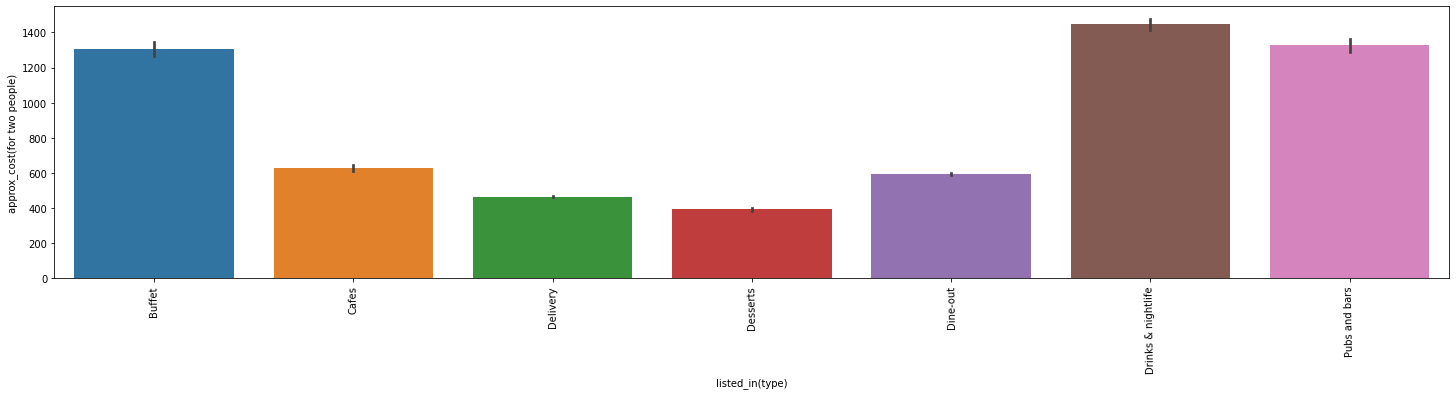

In [101]:
fig = plt.figure(figsize=(25, 5))
sns.barplot(test['listed_in(type)'],df['approx_cost(for two people)'])
plt.xticks(rotation=91)
fig.show()

In [102]:
listed_in_ranks = list(df.groupby('listed_in(type)')['approx_cost(for two people)'].mean().sort_values(ascending=False)[:10].to_dict().keys())

In [103]:
listed_in_ranks

['Drinks & nightlife',
 'Pubs and bars',
 'Buffet',
 'Cafes',
 'Dine-out',
 'Delivery',
 'Desserts']

In [104]:
listed_in_dict = dict()
for index in range(0,len(listed_in_ranks)):
  listed_in_dict[listed_in_ranks[index]] = index

In [105]:
X_train['listed_in(type)'] = X_train['listed_in(type)'].map(listed_in_dict)
X_test['listed_in(type)'] = X_test['listed_in(type)'].map(listed_in_dict)

test['listed_in(type)'] = test['listed_in(type)'].map(listed_in_dict)

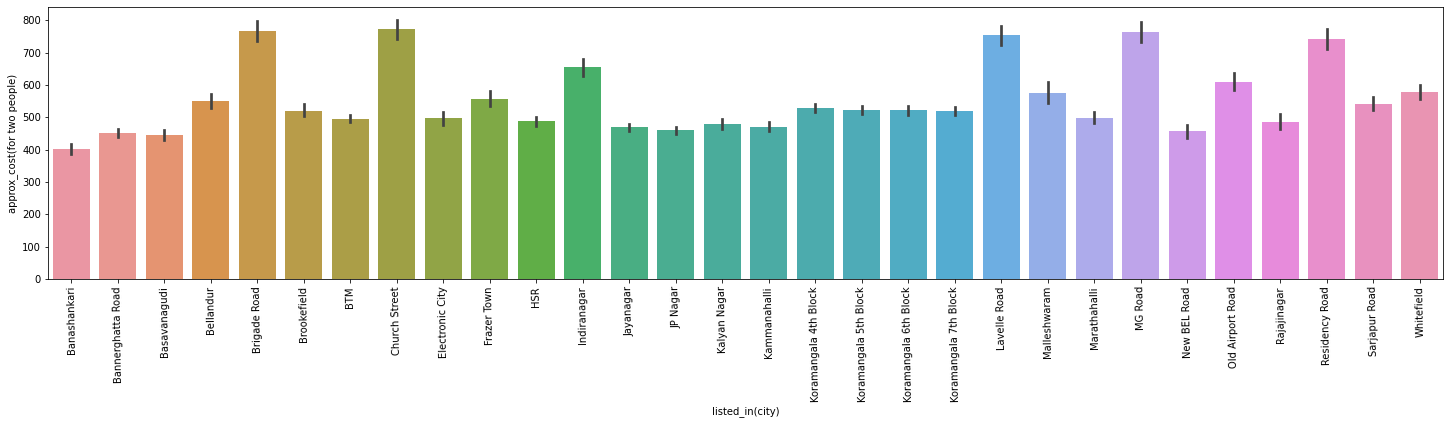

In [106]:
fig = plt.figure(figsize=(25, 5))
sns.barplot(df['listed_in(city)'],df['approx_cost(for two people)'])
plt.xticks(rotation=91)
fig.show()

In [107]:
listed_in_city_ranks = list(df.groupby('listed_in(city)')['approx_cost(for two people)'].mean().sort_values(ascending=False)[:10].to_dict().keys()) + ['Rare']

In [108]:
listed_in_city_ranks

['Church Street',
 'Brigade Road',
 'MG Road',
 'Lavelle Road',
 'Residency Road',
 'Indiranagar',
 'Old Airport Road',
 'Whitefield',
 'Malleshwaram',
 'Frazer Town',
 'Rare']

In [109]:
X_train['listed_in(city)'] = X_train['listed_in(city)'].apply(lambda value: value if value in listed_in_city_ranks else 'Rare')
X_test['listed_in(city)'] = X_test['listed_in(city)'].apply(lambda value: value if value in listed_in_city_ranks else 'Rare')

test['listed_in(city)'] = test['listed_in(city)'].apply(lambda value: value if value in listed_in_city_ranks else 'Rare')

In [110]:
listed_in_city_dict = dict()
for index in range(0,len(listed_in_city_ranks)):
  listed_in_city_dict[listed_in_city_ranks[index]] = index

In [111]:
listed_in_city_dict

{'Church Street': 0,
 'Brigade Road': 1,
 'MG Road': 2,
 'Lavelle Road': 3,
 'Residency Road': 4,
 'Indiranagar': 5,
 'Old Airport Road': 6,
 'Whitefield': 7,
 'Malleshwaram': 8,
 'Frazer Town': 9,
 'Rare': 10}

In [112]:
X_train['listed_in(city)'] = X_train['listed_in(city)'].map(listed_in_city_dict)
X_test['listed_in(city)'] = X_test['listed_in(city)'].map(listed_in_city_dict)

test['listed_in(city)'] = test['listed_in(city)'].map(listed_in_city_dict)

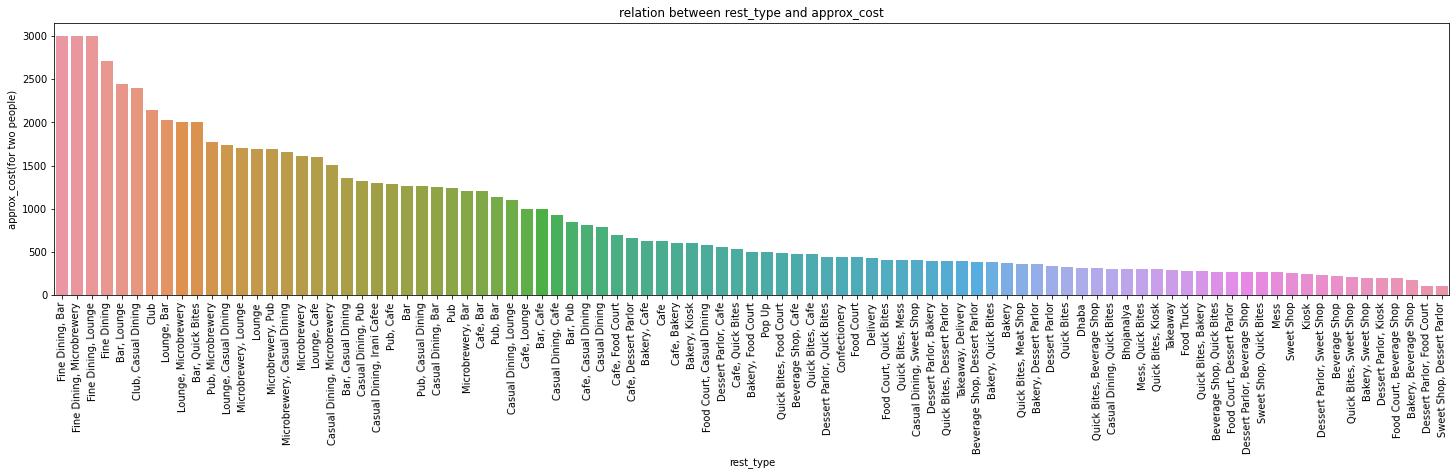

In [113]:
keys = list()
values = list()
for key,value in df.groupby('rest_type')['approx_cost(for two people)'].mean().sort_values(ascending=False).items():
    keys.append(key)
    values.append(value)

fig = plt.figure(figsize=(25, 5))
gfg = sns.barplot(keys,values)
# add label to the axis and label to the plot
gfg.set(xlabel='rest_type',ylabel='approx_cost(for two people)', title ='relation between rest_type and approx_cost')
plt.xticks(rotation=91)
fig.show()


In [114]:
# unique_rest_type = list()
# for value in test['rest_type']:
#   if ',' in value:
#     for item in value.split(','):
#       if item.strip() not in unique_rest_type:
#         unique_rest_type.append(item.strip())
#   else:
#     if value.strip() not in unique_rest_type:
#      unique_rest_type.append(value.strip())

In [115]:
# unique_rest_type_ = list()
# for value in keys[:40]:
#   if ',' in value:
#     for item in value.split(','):
#       if item.strip() not in unique_rest_type_:
#         unique_rest_type_.append(item.strip())
#   else:
#     if value.strip() not in unique_rest_type_:
#      unique_rest_type_.append(value.strip())

In [116]:
# unique_rest_type_rare = [value for value in unique_rest_type if value not in unique_rest_type_]

In [117]:
# unique_rest_type_ = unique_rest_type_ + ['Rare']

In [118]:
# unique_rest_type_

In [119]:
# for value in unique_rest_type_:
  
#   test[f'rest_type_{value}'] = np.zeros(test.shape[0])
#   X_train[f'rest_type_{value}'] = np.zeros(X_train.shape[0])
#   X_test[f'rest_type_{value}'] = np.zeros(X_test.shape[0])
  
#   X_train[f'rest_type_{value}'].astype(int) 
#   X_test[f'rest_type_{value}'].astype(int) 
#   test[f'rest_type_{value}'].astype(int) 

In [120]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17067 entries, 0 to 17066
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   online_order     17067 non-null  int64  
 1   book_table       17067 non-null  int64  
 2   rate             17067 non-null  int64  
 3   votes            17067 non-null  float64
 4   location         17067 non-null  int64  
 5   rest_type        17067 non-null  object 
 6   cuisines         17067 non-null  object 
 7   listed_in(type)  17067 non-null  int64  
 8   listed_in(city)  17067 non-null  int64  
 9   votes_null       17067 non-null  int64  
 10  rate_missing     17067 non-null  int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 1.4+ MB


In [121]:
# for value in unique_rest_type_:
#   for index in range(0,test.shape[0]):
#     if value in test['rest_type'][index]:
#       test[f'rest_type_{value}'][index] = 1
    
#     if  ',' in  test['rest_type'][index]:
#       for item in test['rest_type'][index].split(','):
#         if item.strip() in unique_rest_type_rare:
#           test[f'rest_type_Rare'][index] = 1



# for value in unique_rest_type_:
#   for index in range(0,X_test.shape[0]):
#     if value in X_test['rest_type'][index]:
#       X_test[f'rest_type_{value}'][index] = 1

#     if  ',' in  X_test['rest_type'][index]:
#       for item in X_test['rest_type'][index].split(','):
#         if item.strip() in unique_rest_type_rare:
#           X_test[f'rest_type_Rare'][index] = 1     



# for value in unique_rest_type_:
#   for index in range(0,X_train.shape[0]):
#     if value in X_train['rest_type'][index]:
#       X_train[f'rest_type_{value}'][index] = 1

#     if  ',' in  X_train['rest_type'][index]:
#       for item in X_train['rest_type'][index].split(','):
#         if item.strip() in unique_rest_type_rare:
#           X_train[f'rest_type_Rare'][index] = 1  


In [122]:
# test = test.drop('rest_type',axis=1)
# X_train = X_train.drop('rest_type',axis=1)
# X_test = X_test.drop('rest_type',axis=1)

In [123]:
class handleMixLabels:
  def __init__(self):
    self.keys = list()
    self.values = list()
    pass

  # Step 1 groupby category in mix labels
  def groupbyCategory(self,feature,target,test):
    for key,value in test.groupby(feature)[target].mean().sort_values(ascending=False).items():
      self.keys.append(key)
      self.values.append(value)

  # step 2 get all unique labels from feature column
  def getalluniquelabels(self,test,feature):
    unique_rest_type = list()
    for value in test[feature]:
      if ',' in value:
        for item in value.split(','):
          if item.strip() not in unique_rest_type:
            unique_rest_type.append(item.strip())
      else:
        if value.strip() not in unique_rest_type:
          unique_rest_type.append(value.strip())  
    return unique_rest_type

    # top unique labels from feature columns
  def gettopuniquelabels(self,limit):
    unique_rest_type_ = list()
    for value in self.keys[:limit]:
      if ',' in value:
          for item in value.split(','):
            if item.strip() not in unique_rest_type_:
              unique_rest_type_.append(item.strip())
      else:
        if value.strip() not in unique_rest_type_:
          unique_rest_type_.append(value.strip())
    return unique_rest_type_

  # get rare labels from feature columns
  def getrarelabels(self,feature,target,test,X_train,X_test,limit):
    self.groupbyCategory(feature,target,test)
    unique_rest_type_rare = [value for value in self.getalluniquelabels(test,feature) if value not in self.gettopuniquelabels(limit)]
    unique_rest_type_ = self.gettopuniquelabels(limit) + ['Rare']

    # adding new columns of unique labels in datasets
    for value in unique_rest_type_:
      X_train[f'{feature}_{value}'] = np.zeros(X_train.shape[0])
      X_test[f'{feature}_{value}'] = np.zeros(X_test.shape[0])
            
      X_train[f'{feature}_{value}'].astype(int) 
      X_test[f'{feature}_{value}'].astype(int)   

    # Adding 1 and 0's to those newly added columns
    for value in unique_rest_type_:
      for index in range(0,X_test.shape[0]):
        if value in X_test[feature][index]:
          X_test[f'{feature}_{value}'][index] = 1

        if  ',' in  X_test[feature][index]:
          for item in X_test[feature][index].split(','):
            if item.strip() in unique_rest_type_rare:
              X_test[f'{feature}_Rare'][index] = 1
              

    for value in unique_rest_type_:
      for index in range(0,X_train.shape[0]):
        if value in X_train[feature][index]:
          X_train[f'{feature}_{value}'][index] = 1

        if  ',' in  X_train[feature][index]:
          for item in X_train[feature][index].split(','):
            if item.strip() in unique_rest_type_rare:
              X_train[f'{feature}_Rare'][index] = 1             
    
    X_train = X_train.drop(feature,axis=1)
    X_test = X_test.drop(feature,axis=1)  
    
    return X_test,X_train  




In [124]:
handleMix = handleMixLabels()

In [125]:
X_train,X_test = handleMix.getrarelabels('rest_type','approx_cost(for two people)',test,X_train,X_test,40)

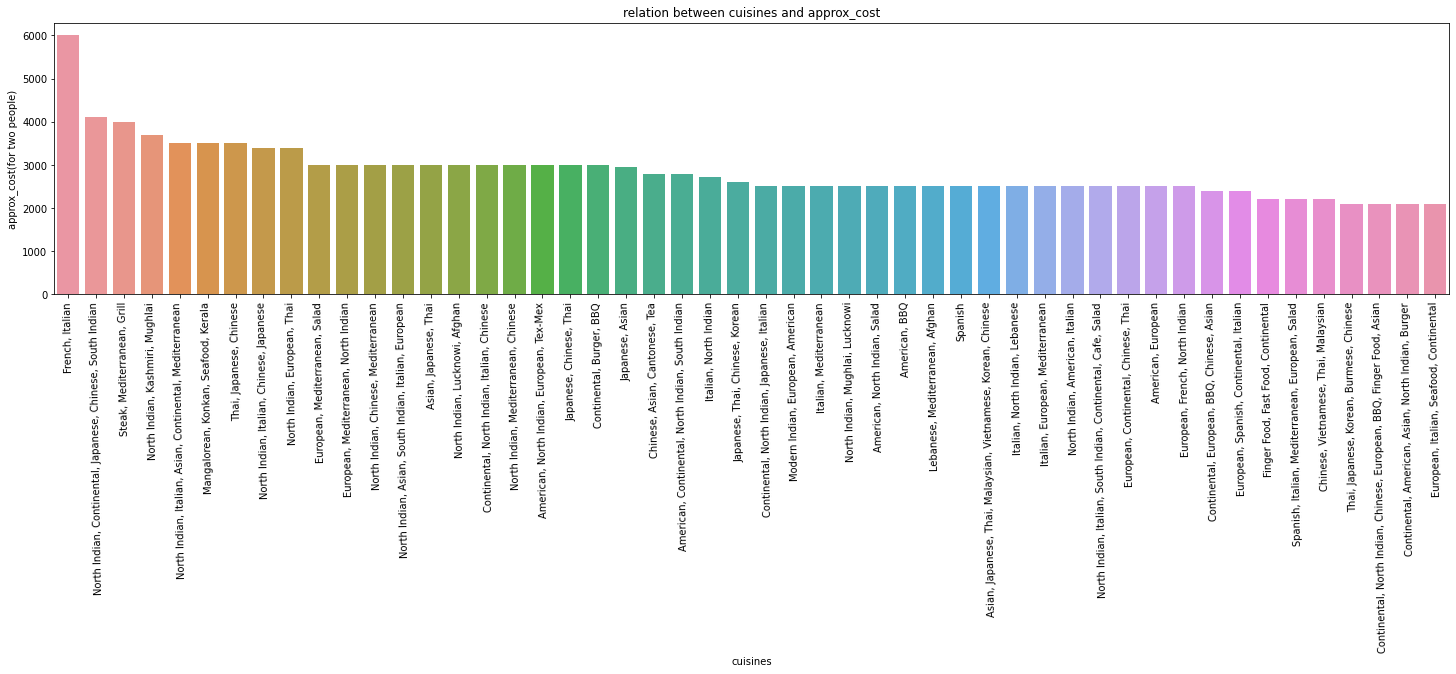

In [126]:
keys = list()
values = list()
for key,value in df.groupby('cuisines')['approx_cost(for two people)'].mean().sort_values(ascending=False).items():
  keys.append(key)
  values.append(value) 
fig = plt.figure(figsize=(25, 5))
gfg = sns.barplot(keys[:50],values[:50])
# add label to the axis and label to the plot
gfg.set(xlabel='cuisines',ylabel='approx_cost(for two people)', title ='relation between cuisines and approx_cost')
plt.xticks(rotation=91)
fig.show()  

In [127]:
# unique_rest_type = list()
# for value in test['rest_type']:
#   if ',' in value:
#     for item in value.split(','):
#       if item.strip() not in unique_rest_type:
#         unique_rest_type.append(item.strip())
#   else:
#     if value.strip() not in unique_rest_type:
#      unique_rest_type.append(value.strip())

In [128]:
# test['cuisines'].value_counts()

# unique_cuisines = list()
# for value in keys[:50]:
#   if ',' in value:
#     for item in value.split(','):
#       if item.strip() not in unique_cuisines:
#         unique_cuisines.append(item.strip())
#   else:
#     if value.strip() not in unique_cuisines:
#       unique_cuisines.append(value.strip())      

# unique_cuisines_ = unique_cuisines + ['Rare']

In [129]:
# def addColumn(category,dataset):
#   dataset[category] = np.zeros(dataset.shape[0]) 

# for value in unique_cuisines_:
#   for index in range(test.shape[0]):
#     if value in test['cuisines'][index]:
#       addColumn(f'{value}_cuisines',test)
#       test[f'{value}_cuisines'][index] = 1

# for value in unique_cuisines_:
#   for index in range(X_train.shape[0]):
#     if value in X_train['cuisines'][index]:
#       addColumn(f'{value}_cuisines',X_train)
#       X_train[f'{value}_cuisines'][index] = 1

# for value in unique_cuisines_:
#   for index in range(X_test.shape[0]):
#     if value in X_test['cuisines'][index]:
#       addColumn(f'{value}_cuisines',X_test)
#       X_test[f'{value}_cuisines'][index] = 1            

In [130]:
X_train,X_test = handleMix.getrarelabels('cuisines','approx_cost(for two people)',test,X_train,X_test,60)

In [131]:
X_train[:15]

,online_order,book_table,rate,votes,location,listed_in(type),listed_in(city),votes_null,rate_missing,rest_type_Fine Dining,rest_type_Bar,rest_type_Microbrewery,rest_type_Lounge,rest_type_Club,rest_type_Casual Dining,rest_type_Quick Bites,rest_type_Pub,rest_type_Cafe,rest_type_Irani Cafee,rest_type_Food Court,rest_type_Dessert Parlor,rest_type_Bakery,rest_type_Rare,cuisines_Fine Dining,cuisines_Bar,cuisines_Microbrewery,cuisines_Lounge,cuisines_Club,cuisines_Casual Dining,cuisines_Quick Bites,cuisines_Pub,cuisines_Cafe,cuisines_Irani Cafee,cuisines_Food Court,cuisines_Dessert Parlor,cuisines_Bakery,cuisines_Kiosk,cuisines_Pop Up,cuisines_Beverage Shop,cuisines_Confectionery,cuisines_Delivery,cuisines_Mess,cuisines_Sweet Shop,cuisines_Rare
0,0,0,4,4.290459,10,6,10,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0,2,5.552960,10,5,10,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,0,1,4.110874,10,5,10,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,4,4.290459,10,5,7,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,0,2,7.237778,10,4,5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,1,0,2,5.552960,10,4,10,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0,0,4,4.290459,10,4,8,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0,1,2,6.884487,10,4,10,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,0,4,4.290459,10,5,10,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1,0,2,6.242223,10,5,10,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [132]:
len(test.columns),len(X_train.columns),len(X_test.columns)

(14, 44, 44)

# Feature Selection

In [133]:
# to build the models
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [134]:
sel_ = SelectFromModel(Lasso(alpha=0.001, random_state=0))

In [135]:
# train Lasso model and select features
sel_.fit(X_train, y_train.fillna(y_train.median()))

SelectFromModel(estimator=Lasso(alpha=0.001, random_state=0))

In [136]:
sel_.get_support().sum()

25

In [137]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feats = X_train.columns[(sel_.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feats)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 44
selected features: 25
features with coefficients shrank to zero: 19


In [138]:
# print the selected features
selected_feats

Index(['online_order', 'book_table', 'rate', 'votes', 'location',
       'listed_in(type)', 'listed_in(city)', 'rest_type_Fine Dining',
       'rest_type_Bar', 'rest_type_Microbrewery', 'rest_type_Lounge',
       'rest_type_Club', 'rest_type_Casual Dining', 'rest_type_Quick Bites',
       'rest_type_Pub', 'rest_type_Cafe', 'rest_type_Irani Cafee',
       'rest_type_Food Court', 'rest_type_Dessert Parlor', 'rest_type_Bakery',
       'rest_type_Rare', 'cuisines_Bar', 'cuisines_Cafe', 'cuisines_Bakery',
       'cuisines_Rare'],
      dtype='object')

# Model Building and Evaluation

In [139]:
ls = Lasso(alpha=0.001, random_state=0).fit(X_train[selected_feats],y_train.fillna(y_train.median()))

In [140]:
pred = ls.predict(X_test[selected_feats])

In [141]:
train_pred = ls.predict(X_train[selected_feats])

In [142]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [143]:
r2_score(y_test.fillna(y_test.median()),pred),mean_absolute_error(y_test.fillna(y_test.median()),pred),np.sqrt(mean_squared_error(y_test.fillna(y_test.median()),pred))

(0.7462371522529392, 146.6049738959692, 217.98266708096247)

In [144]:
r2_score(y_train.fillna(y_test.median()),train_pred)

0.7437300782349615

In [145]:
# from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from  sklearn.svm import LinearSVR
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import roc_curve, auc

In [154]:
dt = DecisionTreeRegressor().fit(X_train[selected_feats],y_train.fillna(y_train.median()))

In [155]:
pred_dt_test = dt.predict(X_test[selected_feats])

In [156]:
r2_score(y_test.fillna(y_test.median()),pred_dt_test)

0.8378678243801394

In [149]:
def getParam(paramerter,estimator):
  train_results = []
  test_results = []
  for param in paramerter:
    dt = estimator(max_leaf_nodes=param)
    dt.fit(X_train,y_train.fillna(y_train.median()))
    train_pred = dt.predict(X_train)
    train_results.append(r2_score(y_train.fillna(y_train.median()), train_pred))
    y_pred = dt.predict(X_test)
    test_results.append(r2_score(y_test.fillna(y_test.median()), y_pred))
  from matplotlib.legend_handler import HandlerLine2D
  line1, = plt.plot(paramerter, train_results, label='Train AUC')
  line2, = plt.plot(paramerter, test_results, label='Test AUC')
  plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
  plt.ylabel('AUC score')
  plt.xlabel('Tree depth')
  plt.show()

In [150]:
params = {'max_depth' : [7,8,9],
'min_samples_split' : [8,9,10,11,12],
'min_samples_leaf' : [3,4,5],
'min_weight_fraction_leaf' : [0.0,0.01,0.02],
'max_leaf_nodes' : [10,11,12,13,14]
}

In [151]:
from sklearn.model_selection import GridSearchCV

In [157]:
dtr = DecisionTreeRegressor(max_depth= 8,max_leaf_nodes= 14,min_samples_leaf=3,min_samples_split= 8,min_weight_fraction_leaf= 0.0).fit(X_train[selected_feats],y_train.fillna(y_train.median()))
# dtr_cv = GridSearchCV(dtr, params, cv=10)

In [160]:
train_pred_dtr = dtr.predict(X_test[selected_feats])

In [161]:
r2_score(y_test.fillna(y_test.median()),train_pred_dtr)

0.7045291282847792

In [ ]:
# dtr_cv.fit(X_train,y_train.fillna(y_train.median()))

In [ ]:
# dtr_cv.best_params_

In [ ]:
# {'max_depth': 8,
#  'max_leaf_nodes': 14,
#  'min_samples_leaf': 3,
#  'min_samples_split': 8,
#  'min_weight_fraction_leaf': 0.0}

In [ ]:
# dtr_cv.best_score_

In [162]:
from sklearn.ensemble import RandomForestRegressor

In [187]:
def getParam(paramerter,estimator):
  train_results = []
  test_results = []
  for param in paramerter:
    dt = estimator(min_samples_leaf=param)
    dt.fit(X_train,y_train.fillna(y_train.median()))
    train_pred = dt.predict(X_train)
    train_results.append(r2_score(y_train.fillna(y_train.median()), train_pred))
    y_pred = dt.predict(X_test)
    test_results.append(r2_score(y_test.fillna(y_test.median()), y_pred))
  from matplotlib.legend_handler import HandlerLine2D
  line1, = plt.plot(paramerter, train_results, label='Train AUC')
  line2, = plt.plot(paramerter, test_results, label='Test AUC')
  plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
  plt.ylabel('AUC score')
  plt.xlabel('Tree depth')
  plt.show()

In [186]:
n_estimators = [100,150,200,250]
max_depth = [4,5,10]
min_samples_split = [2,5,10]
min_samples_leaf = [2,5,7]

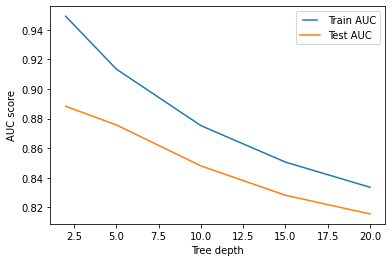

In [188]:
getParam(min_samples_leaf,RandomForestRegressor)

In [189]:
params = {
    'n_estimators':[100,150,200,250],
    'max_depth':[4,5,6,10],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[2,5,7],
    'bootstrap':[True,False],
    'oob_score':[True],
    }

In [190]:
rfr_cv = GridSearchCV(RandomForestRegressor(), params)

In [191]:
rfr_cv.fit(X_train,y_train.fillna(y_train.median()))

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [4, 5, 6, 10],
                         'min_samples_leaf': [2, 5, 7],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 150, 200, 250],
                         'oob_score': [True]})

In [ ]:
{'bootstrap': True,
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100,
 'oob_score': True}

In [192]:
rfr_cv.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100,
 'oob_score': True}

In [193]:
rfr_cv.best_score_

0.8303071838112025

In [194]:
rfr = RandomForestRegressor(bootstrap= True,max_depth= 10,min_samples_leaf= 2,min_samples_split= 2,n_estimators= 100,oob_score= True)

In [197]:
rfr = rfr.fit(X_train[selected_feats],y_train.fillna(y_train.median()))

In [198]:
pred_rfr = rfr.predict(X_test[selected_feats])

In [199]:
r2_score(y_test.fillna(y_test.median()),pred_rfr)

0.8362609382827398